# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from urllib.request import urlopen


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
api_key = "80934ddbe38a79bad2743cb0e31d4bdf"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [16]:
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []
new_cities = []

In [17]:
# include print log of each city as it's being processed, first create a list of city data and then loop
# through the cities in the list 

city_data = []

print("Beginning Data Retrieval")
print("------------------------")

record_count = 0
set_count = 0

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | rzhavki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 2 of set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 3 of set 0 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 4 of set 0 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
City not found!
Processing record 5 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 6 of set 0 | avesta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 7 of set 0 | kalmunai
http://api.openweathermap.org/data/2.5/weather?un

Processing record 10 of set 1 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 11 of set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 12 of set 1 | rawlins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 13 of set 1 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 14 of set 1 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 15 of set 1 | ried
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 16 of set 1 | naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf


Processing record 21 of set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 22 of set 2 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 23 of set 2 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 24 of set 2 | qinzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 25 of set 2 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 26 of set 2 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 27 of set 2 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing 

Processing record 32 of set 3 | loralai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 33 of set 3 | kongwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 34 of set 3 | ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 35 of set 3 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 36 of set 3 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 37 of set 3 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 38 of set 3 | binahaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing r

Processing record 42 of set 4 | kozhva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 43 of set 4 | karlskrona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 44 of set 4 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 45 of set 4 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 46 of set 4 | yamada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 47 of set 4 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 48 of set 4 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
P

Processing record 0 of set 6 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 1 of set 6 | artigas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 2 of set 6 | phangnga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 3 of set 6 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 4 of set 6 | rantepao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 5 of set 6 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 6 of set 6 | zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record

Processing record 8 of set 7 | banda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 9 of set 7 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 10 of set 7 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 11 of set 7 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 12 of set 7 | mundo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 13 of set 7 | kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 14 of set 7 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing r

Processing record 17 of set 8 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 18 of set 8 | phalodi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 19 of set 8 | biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 20 of set 8 | kuito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 21 of set 8 | kassala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 22 of set 8 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
City not found!
Processing record 23 of set 8 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e3

Processing record 25 of set 9 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 26 of set 9 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 27 of set 9 | springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 28 of set 9 | nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 29 of set 9 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 30 of set 9 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 31 of set 9 | tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
P

Processing record 33 of set 10 | weinan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 34 of set 10 | mangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 35 of set 10 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 36 of set 10 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 37 of set 10 | hatta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 38 of set 10 | muriti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 39 of set 10 | nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Process

Processing record 45 of set 11 | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 46 of set 11 | parys
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 47 of set 11 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 48 of set 11 | poanas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 49 of set 11 | mersing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
Processing record 50 of set 11 | phan rang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad2743cb0e31d4bdf
City not found!
Processing record 0 of set 12 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80934ddbe38a79bad

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather)
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Temp          565
Lat           565
Lng           565
Wind Speed    565
dtype: int64

In [50]:
# display the DF 
weather_data

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,rzhavki,100,RU,1596160543,81,51.80,56.00,37.25,6.71
1,rikitea,100,PF,1596160596,89,73.17,-23.12,-134.97,11.48
2,nikolskoye,40,RU,1596160596,93,57.00,59.70,30.79,4.47
3,albany,71,US,1596160596,95,75.00,42.60,-73.97,7.16
4,avesta,7,SE,1596160596,90,55.99,60.15,16.17,5.01
...,...,...,...,...,...,...,...,...,...
560,mersing,40,MY,1596160618,94,73.40,2.43,103.84,3.36
561,sinnamary,44,GF,1596160618,81,78.44,5.38,-52.95,4.59
562,mahebourg,75,MU,1596160618,83,71.60,-20.41,57.70,3.36
563,southbridge,100,US,1596160618,76,72.00,42.08,-72.03,1.52


In [35]:
weather_data_pd = pd.DataFrame(weather_data)

In [37]:
# export data into csv 

weather_data_pd.to_csv("output_data", index_label="City_ID")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

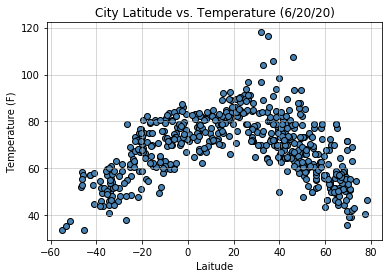

In [53]:
# Scatter plot Lat vs Temp
plt.scatter(weather["Lat"], weather["Temp"], facecolor = "steelblue", edgecolor = "black")

# Labeling of plots, title, axis labels + grid lines
plt.title("City Latitude vs. Temperature (6/20/20)")
plt.xlabel("Laitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Temperature.png")

Observation: Temperature increases significantly at a 40º latitude (areas in the Indian Ocean i.e. Madagascar)

#### Latitude vs. Humidity Plot

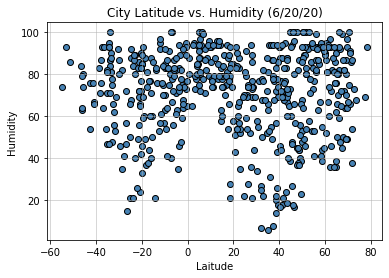

In [47]:
# Scatter plot Lat vs Humidity
plt.scatter(weather["Lat"], weather["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Labeling of plots, title, axis labels + grid lines
plt.title("City Latitude vs. Humidity (6/20/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

Observation: Humidity is no lower than 50 between 0º and 20º latitude, there might be a correlation with humidity and areas close to the equator.

#### Latitude vs. Cloudiness Plot

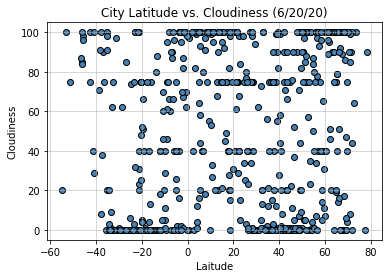

In [48]:
# Scatter plot Lat vs Cloudiness
plt.scatter(weather["Lat"], weather["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Labeling of plots, title, axis labels + grid lines
plt.title("City Latitude vs. Cloudiness (6/20/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Observation: Majority of the cities have either a lot of cloudiness or very little, few cities are in between (50). There is not much correlation between cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

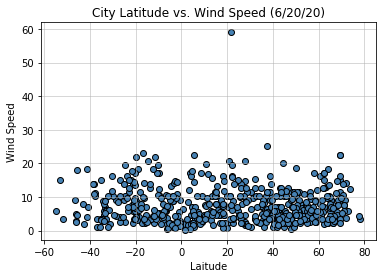

In [49]:
# Scatter plot Lat vs Wind Speed
plt.scatter(weather["Lat"], weather["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Labeling of plots, title, axis labels + grid lines
plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

Observation: Wind Speed is significantly low across all cities except a few. Can depend on season of the year, a more 'dry' season such as summer or beginning of fall. 

## Linear Regression

In [55]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude):
north = weather_data_pd.loc[weather_data_pd["Lat"] >= 0]
south = weather_data_pd.loc[weather_data_pd["Lat"] < 0]

In [78]:
import scipy.stats as st
from scipy.stats import linregress

# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    # perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # create equation of line
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot linear model on top of scatter
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_equation

# annotate
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=10,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.63


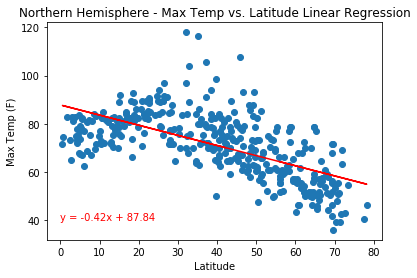

In [79]:
# linear regression northern hemisphere, temp vs lat 
temp_lat_north = linear_regression(north["Lat"], north["Temp"])
annotate(temp_lat_north, 0, 40)

# title, axis labels + save
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


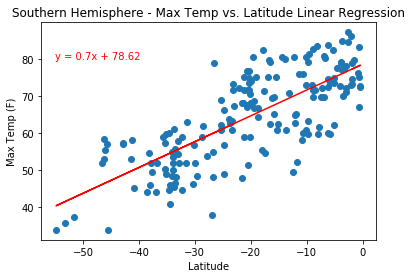

In [81]:
# linear regression southern hemisphere, temp vs lat 
temp_lat_south = linear_regression(south["Lat"], south["Temp"])
annotate(temp_lat_south, -55, 80)

# title, axis labels + save
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.08


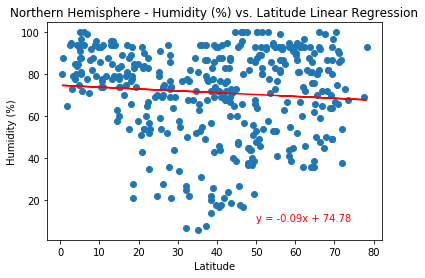

In [83]:
# linear regression northern hemisphere, humidity vs lat 
hum_lat_north = linear_regression(north["Lat"], north["Humidity"])
annotate(hum_lat_north, 50, 10)

# title, axis labels + save
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.0


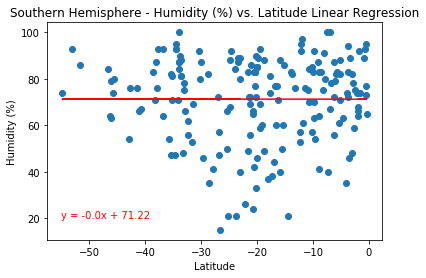

In [85]:
# linear regression southern hemisphere, humidity vs lat 
hum_lat_south = linear_regression(south["Lat"], south["Humidity"])
annotate(hum_lat_south, -55, 20)

# title, axis labels + save
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


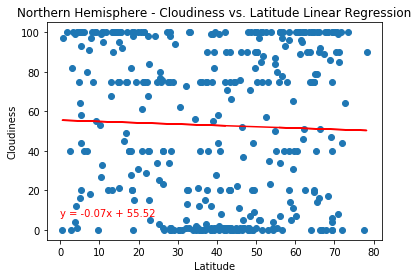

In [88]:
# linear regression northern hemisphere, cloudiness vs lat 
cld_lat_north = linear_regression(north["Lat"], north["Cloudiness"])
annotate(cld_lat_north, 0, 7)

# title, axis labels + save
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


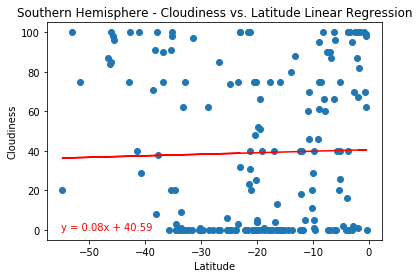

In [89]:
# linear regression southern hemisphere, cloudiness vs lat 
cld_lat_south = linear_regression(south["Lat"], south["Cloudiness"])
annotate(cld_lat_south, -55, 0)

# title, axis labels + save
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0


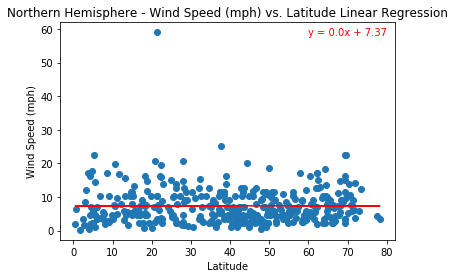

In [97]:
# linear regression northern hemisphere, wind speed vs lat 
wind_lat_north = linear_regression(north["Lat"], north["Wind Speed"])
annotate(wind_lat_north, 60, 58)

# title, axis labels + save
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


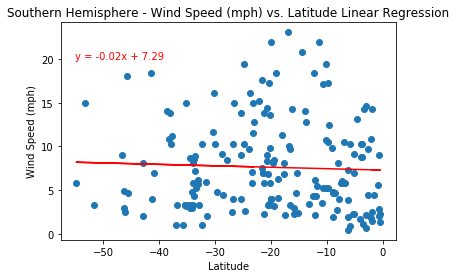

In [102]:
# linear regression southern hemisphere, wind speed vs lat 
wind_lat_south = linear_regression(south["Lat"], south["Wind Speed"])
annotate(wind_lat_south, -55, 20)

# title, axis labels + save
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")